In [ ]:
# @title
import pandas as pd
import random
from datetime import datetime, timedelta

# Função para gerar datas aleatórias
def random_date(start, end):
    delta = end - start
    return start + timedelta(days=random.randint(0, delta.days))

# Intervalo de datas
start_date = datetime(2008, 5, 1)
end_date = datetime(2008, 5, 31)

# Gerar dados
n = 30
data = []
for i in range(n):
    data_venda = random_date(start_date, end_date)
    data_envio = data_venda + timedelta(days=random.randint(3, 10))
    id_loja = random.choice([199, 306, 404])
    id_produto = 384
    id_cliente = random.randint(18000, 20000)
    no_venda = f"{data_venda.strftime('%Y%m%d')}CS{random.randint(500, 600)}"
    custo_unitario = 348.58
    preco_unitario = 758.00
    quantidade = random.randint(1, 10)
    valor_desconto = 0.0
    valor_venda = preco_unitario * quantidade - valor_desconto
    produto = "Adventure Works Laptop15.4W M1548 Red"
    fabricante = "Adventure Works"
    marca = "Adventure Works"
    classe = "Regular"
    cor = "Red"

    data.append([
        data_venda.strftime('%Y-%m-%d'),
        data_envio.strftime('%Y-%m-%d'),
        id_loja, id_produto, id_cliente, no_venda,
        custo_unitario, preco_unitario, quantidade,
        valor_desconto, round(valor_venda, 2),
        produto, fabricante, marca, classe, cor
    ])

# Criar DataFrame
colunas = [
    "Data Venda", "Data Envio", "ID Loja", "ID Produto", "ID Cliente", "No. Venda",
    "Custo Unitário", "Preço Unitário", "Quantidade", "Valor Desconto", "Valor Venda",
    "Produto", "Fabricante", "Marca", "Classe", "Cor"
]

df = pd.DataFrame(data, columns=colunas)

# Salvar como CSV
caminho_csv = "vendas_adventureworks.csv"
df.to_csv(caminho_csv, index=False, sep=";")

print(f"Arquivo CSV gerado com sucesso: {caminho_csv}")


# Explorar / Tratar

In [ ]:
df=pd.read_csv('vendas.csv',sep=';')

In [ ]:
df.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unit,Unitario,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,12/05/2008,15/05/2008,199,388,19228,20080512CS561,684,1200.0,9,0.0,0,Televisao,Samsung,Eyes,Premium,White
1,12/05/2008,19/05/2008,199,385,18859,20080512CS503,180,300.0,7,0.0,0,MicroOndas,Philco,Gold,Regular,Cyan
2,26/05/2008,04/06/2008,199,386,18200,20080526CS509,70,150.0,8,0.0,0,Liquidificador,Arno,Geoliq,Regular,White
3,16/05/2008,26/05/2008,306,384,19412,20080516CS533,1200,2500.0,1,0.0,0,Geladeira,Consul,Sky,Premium,Cyan
4,05/05/2008,11/05/2008,199,388,19436,20080505CS562,684,1200.0,2,0.0,0,Televisao,Samsung,Eyes,Premium,White


In [ ]:
# Qual o tamanho desse trem ?
df.shape


(30, 16)

In [ ]:
# Como vieram as colunas?
df.dtypes

,0
Data Venda,object
Data Envio,object
ID Loja,object
ID Produto,object
ID Cliente,object
No. Venda,object
Custo Unit,object
Unitario,float64
Quantidade,object
Valor Desconto,object


In [ ]:
#Corrigindo Datas
#df['Data Venda'] = pd.to_datetime(df['Data Venda'], format='%d/%m/%Y')
df['Data Venda'] = pd.to_datetime(df['Data Venda'], format='%d/%m/%Y', errors='coerce')
df['Data Envio'] = pd.to_datetime(df['Data Envio'], format='%d/%m/%Y', errors='coerce')
df.dtypes

,0
Data Venda,datetime64[ns]
Data Envio,datetime64[ns]
ID Loja,object
ID Produto,object
ID Cliente,object
No. Venda,object
Custo Unit,object
Unitario,float64
Quantidade,object
Valor Desconto,object


In [ ]:
#Corrigindo Colunas Numericas
df.columns = df.columns.str.strip()
cols_to_float = ['Custo Unit', 'Unitario', 'Quantidade', 'Valor Desconto', 'Valor Venda']

for col in cols_to_float:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df.dtypes

,0
Data Venda,datetime64[ns]
Data Envio,datetime64[ns]
ID Loja,object
ID Produto,object
ID Cliente,object
No. Venda,object
Custo Unit,float64
Unitario,float64
Quantidade,float64
Valor Desconto,float64


In [ ]:
# Nulos ?
df.isnull().sum()
df.dropna(inplace=True)
df.shape

(28, 16)

In [ ]:
# Bizoiar
df.head(3)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unit,Unitario,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-12,2008-05-15,199,388,19228,20080512CS561,684.0,1200.0,9.0,0.0,0.0,Televisao,Samsung,Eyes,Premium,White
1,2008-05-12,2008-05-19,199,385,18859,20080512CS503,180.0,300.0,7.0,0.0,0.0,MicroOndas,Philco,Gold,Regular,Cyan
2,2008-05-26,2008-06-04,199,386,18200,20080526CS509,70.0,150.0,8.0,0.0,0.0,Liquidificador,Arno,Geoliq,Regular,White


# Analises

In [ ]:
# Calcular valor da venda
df['Valor Venda'] = df['Unitario'] * df['Quantidade']
df.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unit,Unitario,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-12,2008-05-15,199,388,19228,20080512CS561,684.0,1200.0,9.0,0.0,10800.0,Televisao,Samsung,Eyes,Premium,White
1,2008-05-12,2008-05-19,199,385,18859,20080512CS503,180.0,300.0,7.0,0.0,2100.0,MicroOndas,Philco,Gold,Regular,Cyan
2,2008-05-26,2008-06-04,199,386,18200,20080526CS509,70.0,150.0,8.0,0.0,1200.0,Liquidificador,Arno,Geoliq,Regular,White
3,2008-05-16,2008-05-26,306,384,19412,20080516CS533,1200.0,2500.0,1.0,0.0,2500.0,Geladeira,Consul,Sky,Premium,Cyan
4,2008-05-05,2008-05-11,199,388,19436,20080505CS562,684.0,1200.0,2.0,0.0,2400.0,Televisao,Samsung,Eyes,Premium,White


In [ ]:
# How much ?
df['Valor Venda'].sum()

np.float64(122590.0)

In [ ]:
# Ai..Ai. No bolso
df['Custo Total'] = df['Quantidade'].mul(df['Custo Unit'])
round(df['Custo Total'].sum(), 2)


np.float64(64070.0)

In [ ]:
# As duas colunas
display(df[['Valor Venda', 'Custo Total']])


,Valor Venda,Custo Total
0,10800.0,6156.0
1,2100.0,1260.0
2,1200.0,560.0
3,2500.0,1200.0
4,2400.0,1368.0
5,17500.0,8400.0
6,2700.0,1620.0
7,1850.0,1091.0
8,9600.0,5472.0
9,12500.0,6000.0


In [ ]:
# Lucrei ?
df['Lucro'] = df['Valor Venda'] - df['Custo Total']
#df['Lucro'].sum()

# As tres colunas
#display(df[['Valor Venda', 'Custo Total','Lucro']])

# Analisando Custo, Venda e Lucro
display(df[['Valor Venda', 'Custo Total','Lucro']].sum())

,0
Valor Venda,122590.0
Custo Total,64070.0
Lucro,58520.0


In [ ]:
# Tempo de Envio
df['Tempo Envio'] = (df['Data Envio'] - df['Data Venda']).dt.days
df['Tempo Envio'].mean()

np.float64(6.571428571428571)

In [ ]:
# Tempo de Envio por Produto/Marca
df_tempo_envio=df.groupby("Produto")['Tempo Envio'].mean()
df_tempo_envio.sort_values(ascending=False)

,Tempo Envio
Produto,
Fogao,8.500000
Geladeira,7.500000
MicroOndas,6.800000
Liquidificador,6.666667
Secador,6.333333
Freezer,6.000000
Televisao,4.750000


In [ ]:
df_lucro_produto=df.groupby("Produto")['Lucro'].sum()
df_lucro_produto.sort_values(ascending=False)

,Lucro
Produto,
Geladeira,29900.0
Televisao,14448.0
MicroOndas,4320.0
Fogao,4056.0
Liquidificador,3520.0
Secador,1517.0
Freezer,759.0


In [ ]:
df_lucro_dia=df.groupby(df["Data Venda"].dt.day)['Lucro'].sum()
df_lucro_dia = df_lucro_dia.reset_index()
df_lucro_dia.mean()
df_lucro_dia.sort_values(by='Data Venda', ascending=True)

,Data Venda,Lucro
0,1,13000.0
1,2,360.0
2,4,759.0
3,5,2108.0
4,11,82.0
5,12,5484.0
6,13,4644.0
7,14,9900.0
8,15,3380.0
9,16,7800.0


In [ ]:
# Qual dia ficou na média ?

lucro_dia = df_lucro_dia['Lucro'].mean()
print(f"Lucro medio por dia {lucro_dia:.2f}")
dias_media = df_lucro_dia[ df_lucro_dia['Lucro'] >= lucro_dia]
print("\nDias com lucro na média :")
display(dias_media.head(20))


Lucro medio por dia 2926.00

Dias com lucro na média :


,Data Venda,Lucro
0,1,13000.0
5,12,5484.0
6,13,4644.0
7,14,9900.0
8,15,3380.0
9,16,7800.0
10,17,4128.0


In [ ]:
# Total de Produtos Vendidos
df_produtos_vendidos=df.groupby("Produto")['Quantidade'].sum()
df_produtos_vendidos
#df_produtos_vendidos=df.groupby("Produto")['Valor Venda'].sum()
#df_produtos_vendidos

,Quantidade
Produto,
Fogao,12.0
Freezer,1.0
Geladeira,23.0
Liquidificador,44.0
MicroOndas,36.0
Secador,37.0
Televisao,28.0


# Graficos

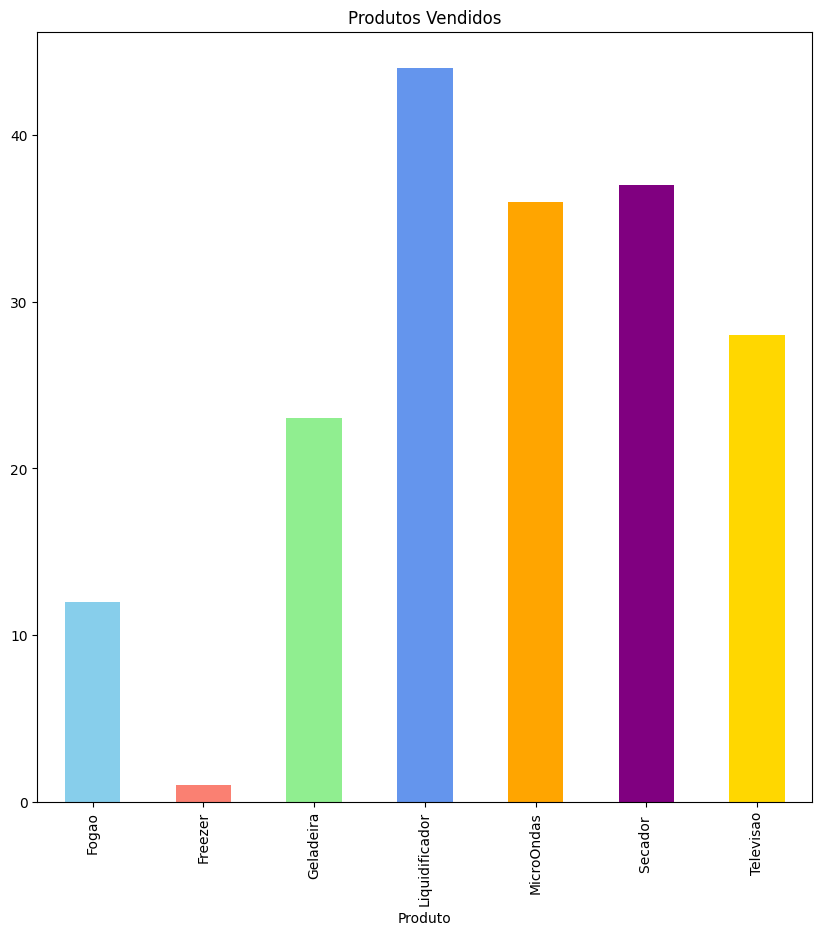

In [ ]:
# Grafico dos Produtos Vendidos
cores = ['skyblue', 'salmon', 'lightgreen', 'cornflowerblue', 'orange', 'purple', 'gold']
df_produtos_vendidos=df.groupby("Produto")['Quantidade'].sum().plot.bar(
    title='Produtos Vendidos',
    figsize=(10, 10), color=cores
)


#df_produtos_vendidos=df.groupby("Produto")['Quantidade'].sum().plot.pie(title='Produtos Vendidos')
#df_produtos_vendidos=df.groupby("Produto")['Quantidade'].sum().plot.pie(title='Produtos Vendidos', autopct='%1.1f%%')
#df_produtos_vendidos=df.groupby("Produto")['Quantidade'].sum().plot.pie(title='Produtos Vendidos', autopct='%1.1f%%', figsize=(10, 10))


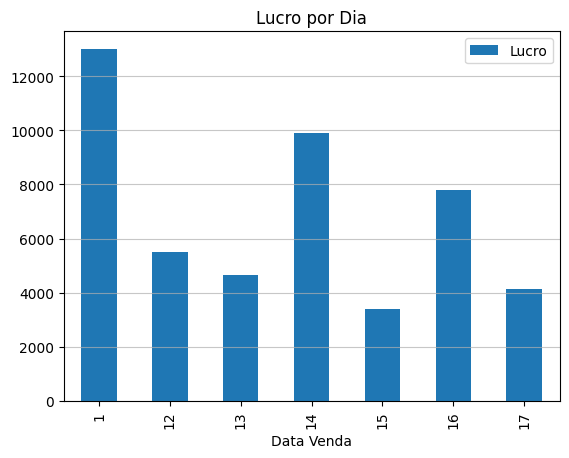

In [ ]:
ax = dias_media.plot.bar(x='Data Venda', y='Lucro', title='Lucro por Dia')
ax.grid(axis='y', linestyle='solid', alpha=0.7)

### Analise + funda

In [ ]:
df['Tempo Envio'].describe()
#

,Tempo Envio
count,28.000000
mean,6.571429
std,2.218250
min,3.000000
25%,5.000000
50%,6.500000
75%,8.250000
max,10.000000


In [ ]:
import matplotlib.pyplot as plt

{'whiskers': [<matplotlib.lines.Line2D at 0x7a9cbb19c740>,
 'caps': [<matplotlib.lines.Line2D at 0x7a9cbb19cc80>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a9cbb19c6b0>],
 'medians': [<matplotlib.lines.Line2D at 0x7a9cbb19d250>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a9cbb19d520>],
 'means': []}

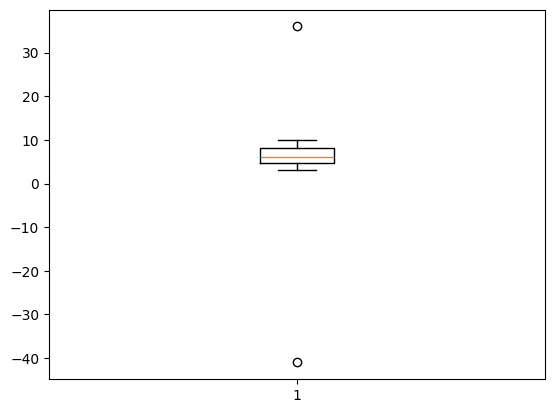

In [ ]:
plt.boxplot(df['Tempo Envio'])

In [ ]:
df.loc[2, 'Data Venda'] = pd.to_datetime("2008/04/29 00:00:00")
df.head(3)
df['Tempo Envio'] = (df['Data Envio'] - df['Data Venda']).dt.days

# SQL

In [ ]:
#@title Gerando a base

import sqlite3

# Caminho do banco de dados (será criado no ambiente do Colab)
db_path = "vendas.db"

# Conectar ao banco
conn = sqlite3.connect(db_path)
cursor = conn.cursor()

# Ler o arquivo SQL gerado
with open("vendas_inserts.sql", "r", encoding="utf-8") as f:
    sql_script = f.read()

# Executar o script SQL (criação da tabela + inserções)
cursor.executescript(sql_script)
conn.commit()

df_db = pd.read_sql_query("SELECT * FROM vendas", conn)

conn.close()

In [ ]:
#@title Lendo a base

display(df_db)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unit,Unitario,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-28,2008-06-20,199,387,18675,20080529CS551,79.0,120.0,4,0.0,0.0,Secador,Mideia,Secato,Regular,Red
1,2008-05-08,2008-05-23,199,386,19709,20080523CS586,70.0,150.0,6,0.0,0.0,Liquidificador,Arno,Geoliq,Regular,White
2,2008-07-24,2008-05-07,306,385,18454,20080502CS537,180.0,300.0,9,0.0,0.0,MicroOndas,Philco,Gold,Regular,Cyan
3,2008-06-14,2008-05-31,199,387,19721,20080529CS559,79.0,120.0,9,0.0,0.0,Secador,Mideia,Secato,Regular,Red
4,2008-06-23,2008-05-30,199,388,19499,20080517CS574,684.0,1200.0,9,0.0,0.0,Televisao,Samsung,Eyes,Premium,White
5,2008-05-09,2008-07-26,199,384,18854,20080516CS581,1200.0,2500.0,4,0.0,0.0,Geladeira,Consul,Sky,Premium,Cyan
6,2008-05-14,2008-05-19,199,387,19499,20080511CS594,79.0,120.0,3,0.0,0.0,Secador,Mideia,Secato,Regular,Red
7,2008-06-11,2008-05-09,,,,,0.0,0.0,15,0.0,0.0,,,,,
8,2008-05-09,2008-06-28,404,389,19307,20080515CS577,312.0,650.0,7,0.0,0.0,Fogao,Arno,Quentato,Premium,Cyan
9,2008-05-05,2008-05-23,199,388,19228,20080512CS561,684.0,1200.0,14,0.0,0.0,Televisao,Samsung,Eyes,Premium,White


In [ ]:
#@title Tratando colunas

ren_colunas = {
    "Data_Venda": "Data Venda",
    "Data_Envio": "Data Envio",
    "ID_Loja": "ID Loja",
    "ID_Produto": "ID Produto",
    "ID_Cliente": "ID Cliente",
    "No_Venda": "No. Venda",
    "Custo_Unit": "Custo Unit",
    "Unitario": "Unitario",
    "Quantidade": "Quantidade",
    "Valor_Desconto": "Valor Desconto",
    "Valor_Venda": "Valor Venda",
    "Produto": "Produto",
    "Fabricante": "Fabricante",
    "Marca": "Marca",
    "Classe": "Classe",
    "Cor": "Cor",
}
df_db = df_db.rename(columns=ren_colunas)

In [ ]:
display(df_db)

In [ ]:
#@title Concatenando
#df=pd.read_csv('vendas.csv',sep=';')
df_final = pd.concat([df, df_db], ignore_index=True)
df_final


,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unit,Unitario,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo Total,Lucro,Tempo Envio
0,2008-05-12 00:00:00,2008-05-15 00:00:00,199,388,19228,20080512CS561,684.0,1200.0,9.0,0.0,10800.0,Televisao,Samsung,Eyes,Premium,White,6156.0,4644.0,3.0
1,2008-06-29 00:00:00,2008-05-19 00:00:00,199,385,18859,20080512CS503,180.0,300.0,7.0,0.0,2100.0,MicroOndas,Philco,Gold,Regular,Cyan,1260.0,840.0,-41.0
2,2008-04-29 00:00:00,2008-06-04 00:00:00,199,386,18200,20080526CS509,70.0,150.0,8.0,0.0,1200.0,Liquidificador,Arno,Geoliq,Regular,White,560.0,640.0,36.0
3,2008-05-16 00:00:00,2008-05-26 00:00:00,306,384,19412,20080516CS533,1200.0,2500.0,1.0,0.0,2500.0,Geladeira,Consul,Sky,Premium,Cyan,1200.0,1300.0,10.0
4,2008-05-05 00:00:00,2008-05-11 00:00:00,199,388,19436,20080505CS562,684.0,1200.0,2.0,0.0,2400.0,Televisao,Samsung,Eyes,Premium,White,1368.0,1032.0,6.0
5,2008-05-14 00:00:00,2008-05-22 00:00:00,306,384,19709,20080514CS596,1200.0,2500.0,7.0,0.0,17500.0,Geladeira,Consul,Sky,Premium,Cyan,8400.0,9100.0,8.0
6,2008-05-20 00:00:00,2008-05-29 00:00:00,199,385,19243,20080520CS579,180.0,300.0,9.0,0.0,2700.0,MicroOndas,Philco,Gold,Regular,Cyan,1620.0,1080.0,9.0
7,2008-05-04 00:00:00,2008-05-10 00:00:00,306,390,19581,20080504CS595,1091.0,1850.0,1.0,0.0,1850.0,Freezer,Brastemp,Gelato,Premium,White,1091.0,759.0,6.0
8,2008-05-17 00:00:00,2008-05-22 00:00:00,199,388,19499,20080517CS574,684.0,1200.0,8.0,0.0,9600.0,Televisao,Samsung,Eyes,Premium,White,5472.0,4128.0,5.0
9,2008-05-16 00:00:00,2008-05-20 00:00:00,199,384,18854,20080516CS581,1200.0,2500.0,5.0,0.0,12500.0,Geladeira,Consul,Sky,Premium,Cyan,6000.0,6500.0,4.0


In [ ]:
#@title Como ficou

display(df_final[['Valor Venda', 'Lucro']].describe())

,Valor Venda,Lucro
count,58.000000,28.000000
mean,2113.620690,2090.000000
std,4686.038876,3067.851474
min,0.000000,82.000000
25%,0.000000,407.500000
50%,0.000000,800.000000
75%,1500.000000,1820.000000
max,25000.000000,13000.000000
